# <center>Prediction of quality of Wine using linear regression </center>


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [37]:
path = r"C:\Users\lenovo\Downloads\archive (7)\WineQT.csv"
df_raw = pd.read_csv(path)

In [38]:
display(df_raw.head(0))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id


In [39]:
display(df_raw.head(1))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [40]:
# If the data is malformatted as a single column, split it into multiple columns
if len(df_raw.columns) == 1:
    split_col = df_raw.columns[0]
    df = df_raw[split_col].str.split(',', expand=True)
    
    headers = ['fixed acidity','volatile acidity','citric acid','residual sugar',
               'chlorides','free sulfur dioxide','total sulfur dioxide','density',
               'pH','sulphates' ,'alcoho','quality','Id']
    df.columns = headers
else:
    df = df_raw

# Convert all values to float for further analysis
df = df.apply(pd.to_numeric, errors='coerce')  # This will convert strings to NaN if they can't be changed to numbers

display(df.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [41]:
display(df.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [42]:
print("Shape of Dataset:", df.shape)
print(df.isnull().sum())


Shape of Dataset: (1143, 13)
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


In [44]:
display(df['quality'].value_counts())

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [45]:
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


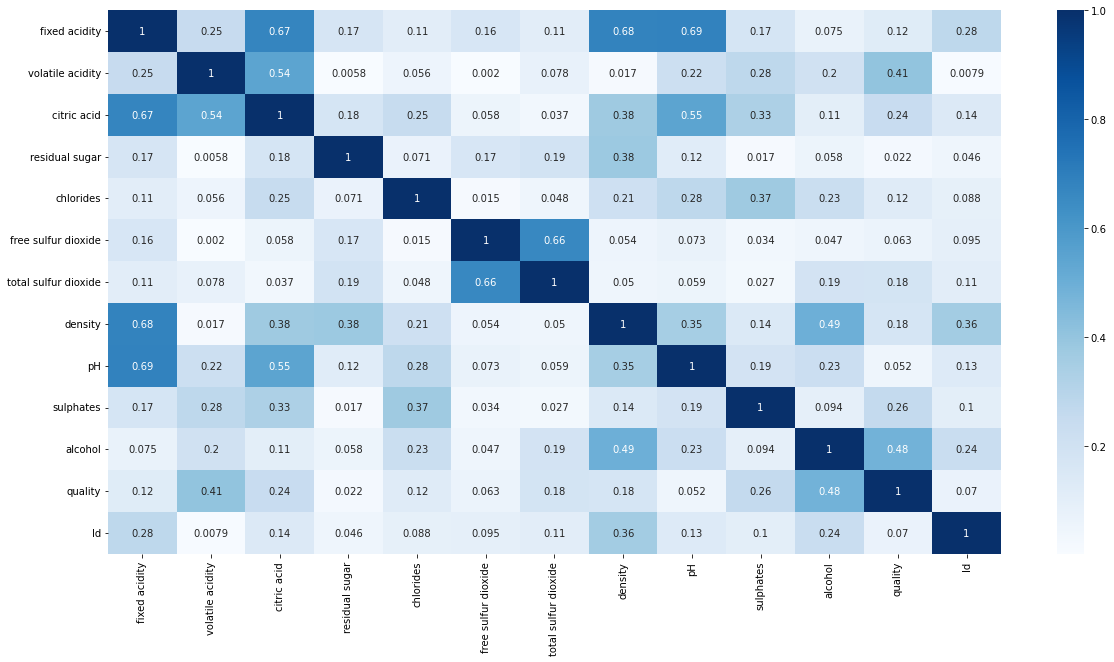

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True, cmap='Blues')
plt.show()


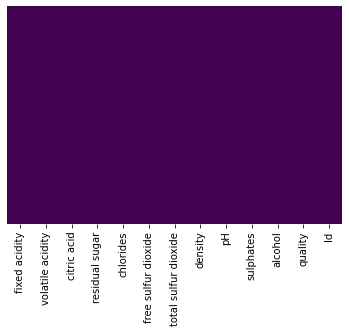

In [47]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

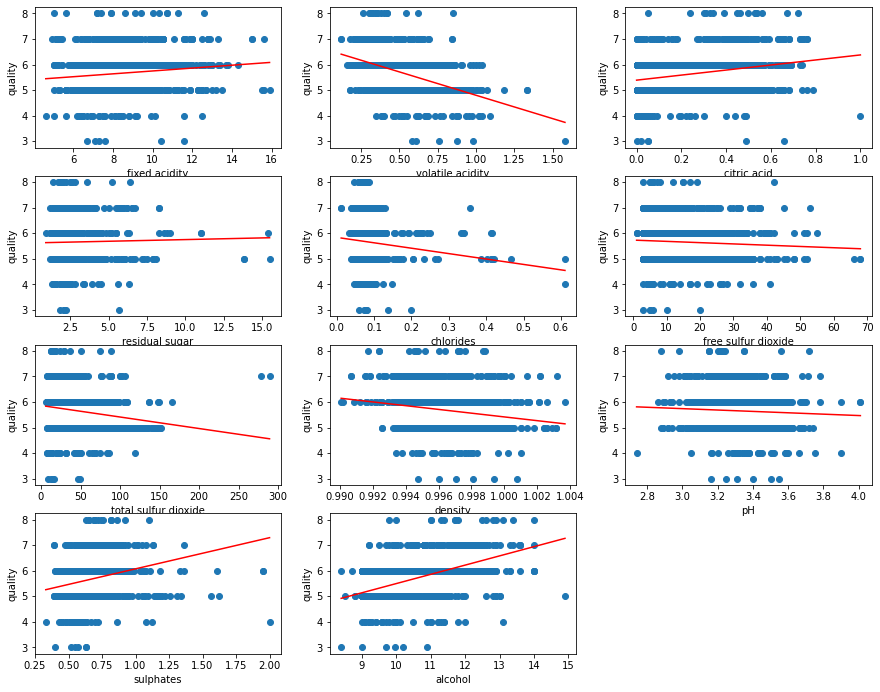

In [48]:
plt.figure(figsize=(15, 15))

for i, idx in enumerate(df.columns[0:11]):
    plt.subplot(5, 3, i+1)
    x = df[idx]
    y = df['quality']
    plt.plot(x, y, 'o')
    

    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='red')
    plt.xlabel(idx)
    plt.ylabel('quality')    

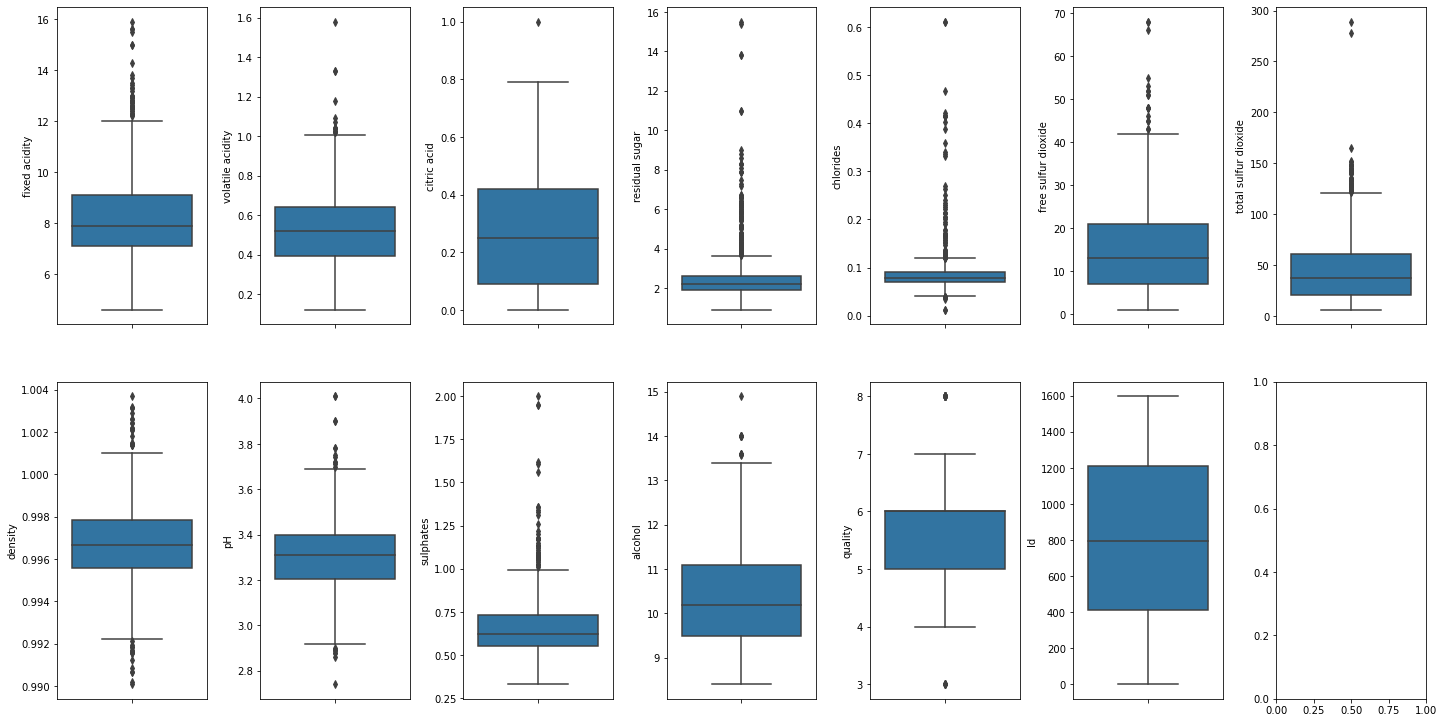

In [49]:

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


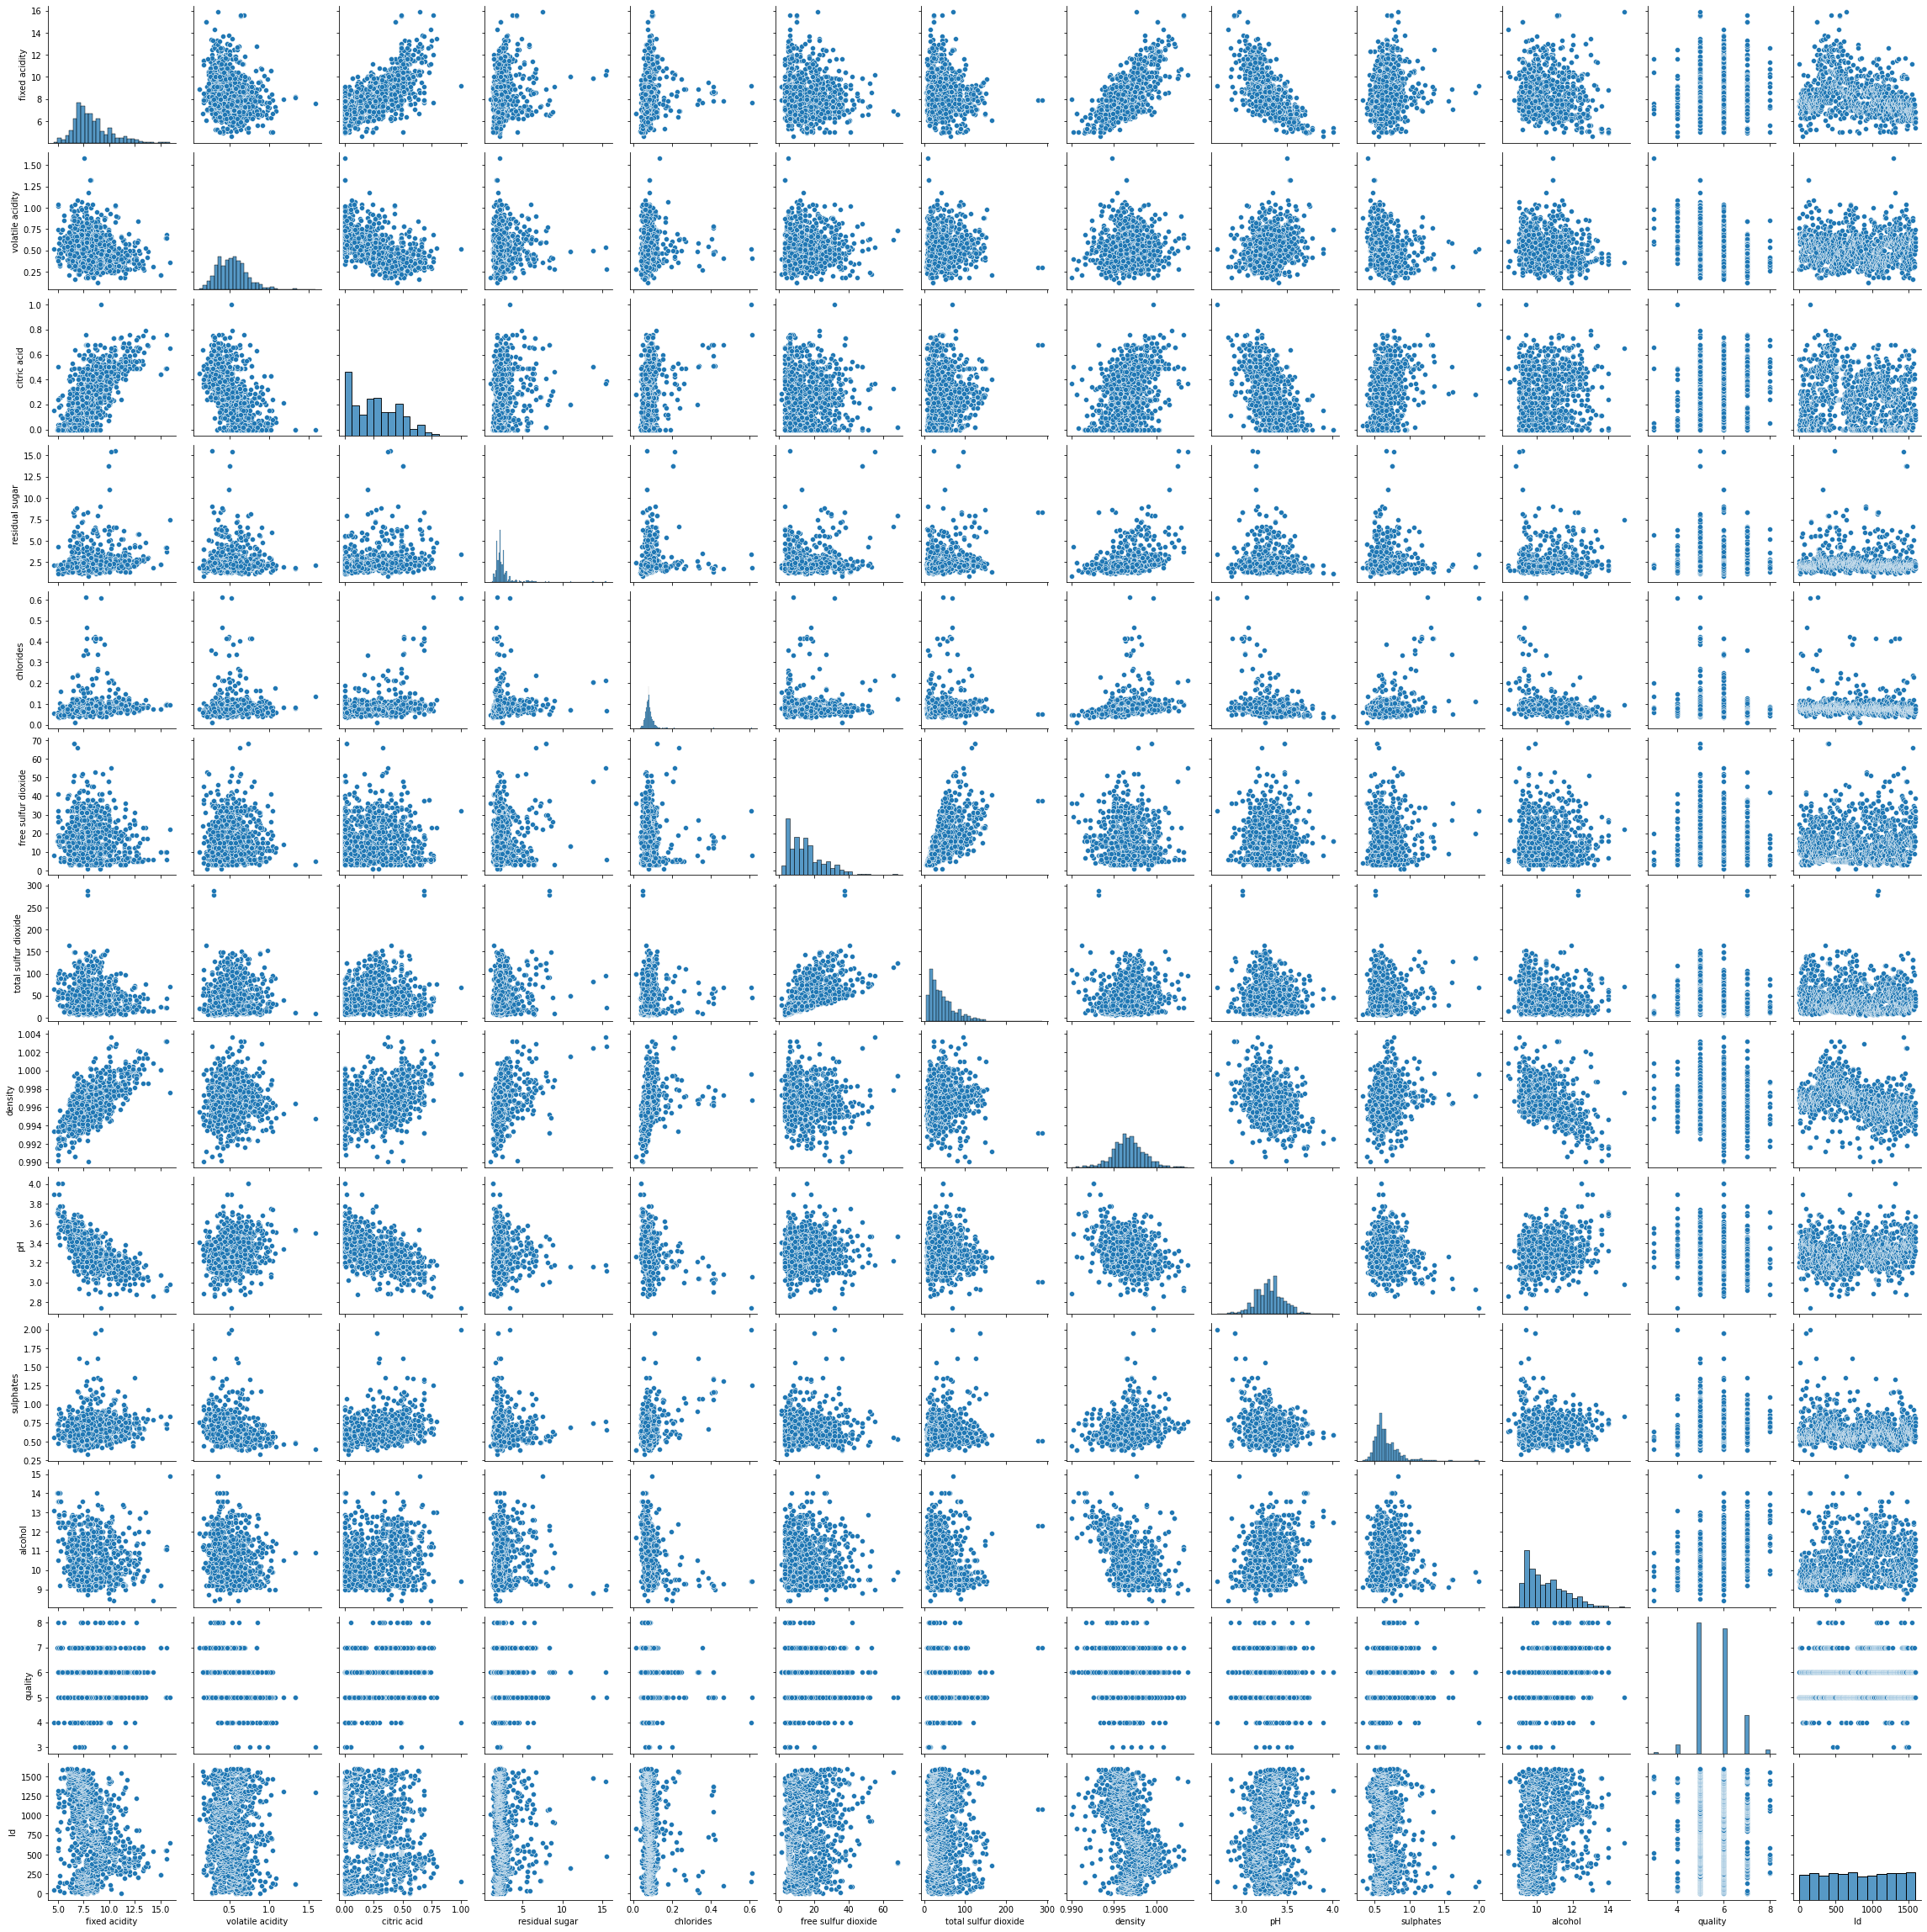

In [50]:
#visualization
sns.pairplot(df)
plt.show()

In [51]:
x = df.iloc[:, 0:11]
y = df.iloc[:, -2]
display(x)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [52]:
display(y)

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print('Training Shape: ', x_train.shape)
print('Testing Shape: ', x_test.shape)

Training Shape:  (914, 11)
Testing Shape:  (229, 11)


In [54]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [55]:
import numpy as np

y_predict = regression_model.predict(x_test)
y_predict_rounded = np.round(y_predict)

sum = 0
for i, n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1

correct_predictions = np.sum(y_test == y_predict_rounded)
accuracy = correct_predictions / len(y_test)
print(accuracy)


0.6375545851528385


In [56]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ', model.score(x_train, y_train)*100)
print('Testing Accuracy: ', model.score(x_test, y_test)*100)
print('Model Accuracy: ', r2_score(y, model.predict(x))*100)


Training Accuracy:  38.21938480651566
Testing Accuracy:  31.70693672733109
Model Accuracy:  37.100395008109054


In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)


In [58]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

#Prediction
prediction=regressor.predict(x_test)
prediction1=pd.DataFrame(prediction)
display(prediction1)

,0
0,5.376391
1,4.812752
2,5.268227
3,5.088265
4,6.096687
...,...
224,4.765873
225,6.115402
226,5.305511
227,5.465186


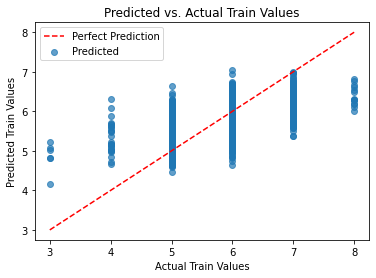

In [59]:
# Plotting the linear regression line for training data
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()

plt.show()


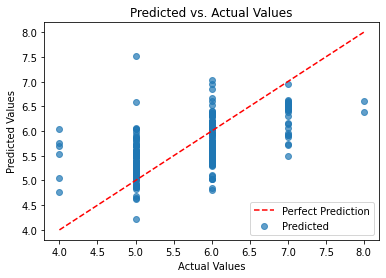

In [60]:
y_test_pred = model.predict(x_test)

# Plotting the linear regression line
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted')

# Plotting the line for perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.legend()

plt.show()


use another algorithm to increase accuracy

Training Accuracy:  100.0
Testing Accuracy:  -9.862243848947916
Model Accuracy:  81.12090079801418


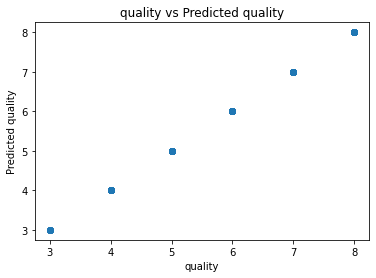

In [61]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("quality")
plt.ylabel("Predicted quality")
plt.title("quality vs Predicted quality")
plt.show()

Training Accuracy:  92.41015189413375
Testing Accuracy:  46.549585703515895
Model Accuracy:  84.52933336794068


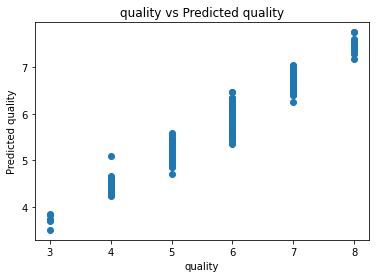

In [62]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("quality")
plt.ylabel("Predicted quality")
plt.title("quality vs Predicted quality")
plt.show()

In [63]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Training Accuracy:  99.94603226028119
Testing Accuracy:  38.46298672154439
Model Accuracy:  89.38057808147607


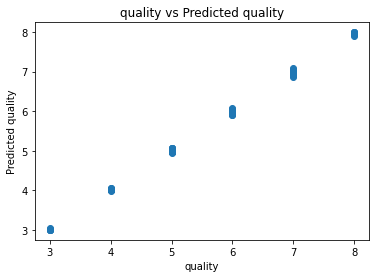

In [64]:

import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("quality")
plt.ylabel("Predicted quality")
plt.title("quality vs Predicted quality")
plt.show()

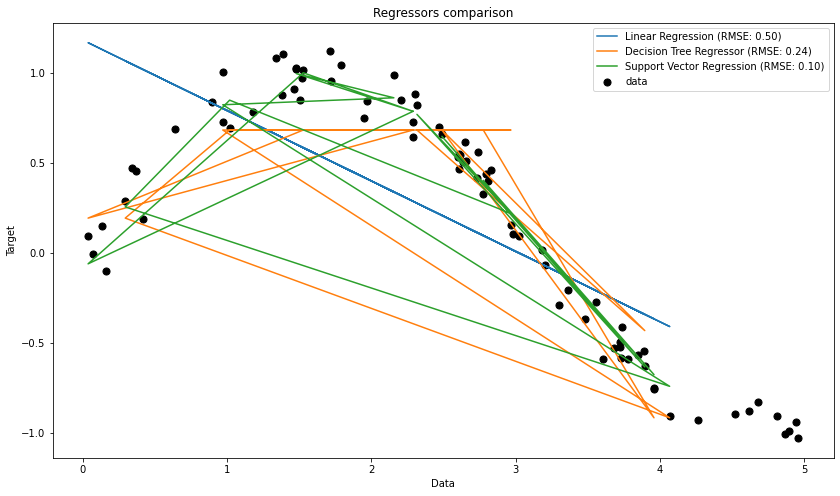

In [65]:
# Generating sample data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
}

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()


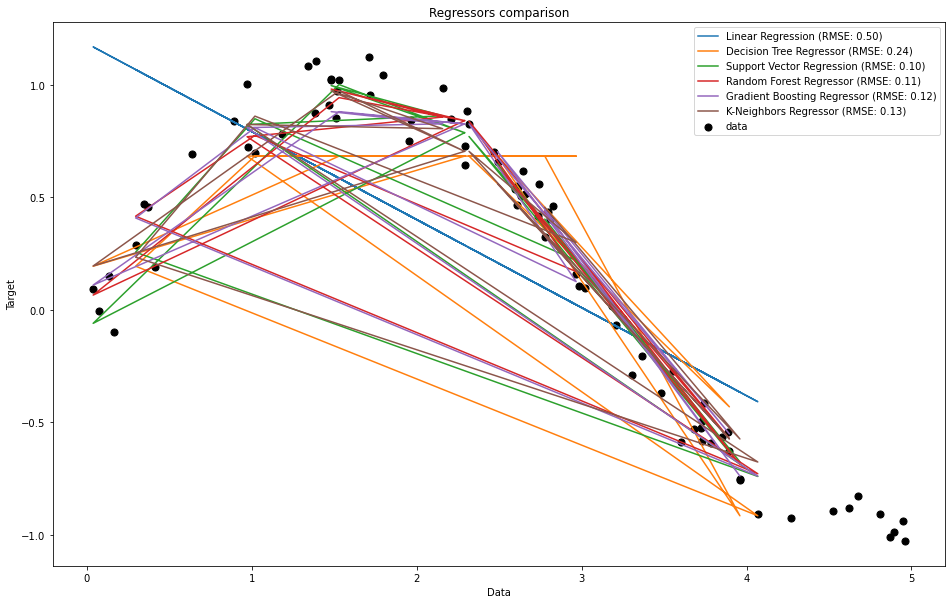

In [66]:
  # Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Plotting
plt.figure(figsize=(16, 10))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()
